<h1 align="center">Iris Review</h1>

<div align="center">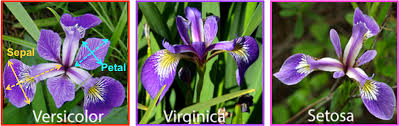</div>
<h1 align="center"></h1>
<div style="text-align: justify">&emsp;&emsp;Dataset Iris ini adalah salah satu jenis bunga yang memiliki 3 jenis species iris yaitu, Setosa, Versicolor, dan Virginica.Petal adalah Mahkota bagian atas dan Sepal adalah mahkota bagian bawah. Dari dataset ini kita memiliki 4 variable yang akan kita cermati dan sebuah kelas label yang berisi keterangan dari spesies dari bunga tersebut</div>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [3]:
irisDF = pd.read_csv('IRIS.csv')
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
irisDF.shape #bentuk/dimensi dataset (baris,kolom)
irisDF.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
irisDF.isna().values.any()

False

In [6]:
irisDF[irisDF.duplicated(keep=False)] # menampilkan semua baris yang terduplikasi
#irisDF[irisDF.duplicated()] #menampilkan baris data sekunder yang terduplikasi

,sepal_length,sepal_width,petal_length,petal_width,species
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


In [7]:
irisDF.duplicated().value_counts() #jumlah duplikasi

False    147
True       3
dtype: int64

In [8]:
irisDF.drop_duplicates(inplace=True) #menghapus data sekunder yang duplikasi
irisDF.shape

(147, 5)

In [9]:
irisDF.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
irisDF.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


<h1> Visualisasi Data </h1>


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

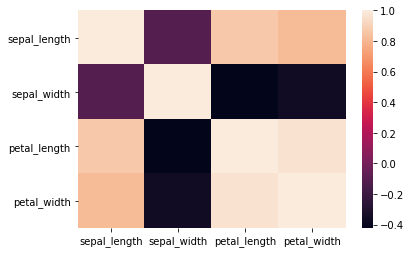

In [12]:
sns.heatmap(data=irisDF.corr())

<h1>Bar Plot</h1>

In [13]:
irisDF['species'].value_counts() #menghitung jumlah setiap species

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64

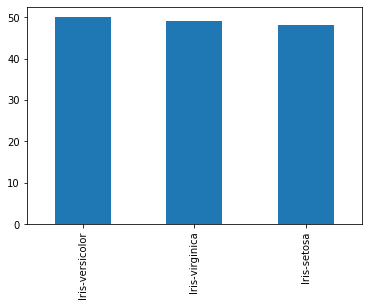

In [14]:
irisDF['species'].value_counts().plot.bar()
plt.show()

 <p>Dari Bar Plot ini kita bisa melihat jenis species dari sumbu X dan jumlah data dari setiap speciesnya pada sumbu Y</p>

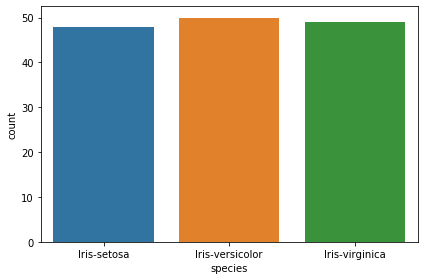

In [15]:
sns.countplot(data=irisDF, x='species')
plt.tight_layout()

<h1> Pie Chart </h1>

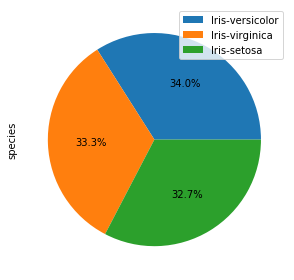

In [16]:
irisDF['species'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True)# melihat jumlah data dari setiap species menggunakan persentase
plt.tight_layout()

<h1> Line Plot </h1>

Text(0.5, 1.0, 'sepal_length')

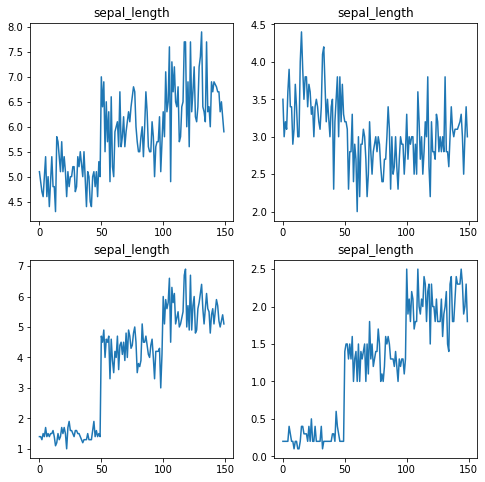

In [17]:
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8)) # Tiap kolom akan di ploting pada tiap sub plotnya

irisDF['sepal_length'].plot.line(ax=ax[0][0])
ax[0][0].set_title('sepal_length')

irisDF['sepal_width'].plot.line(ax=ax[0][1])
ax[0][1].set_title('sepal_length')

irisDF['petal_length'].plot.line(ax=ax[1][0])
ax[1][0].set_title('sepal_length')

irisDF['petal_width'].plot.line(ax=ax[1][1])
ax[1][1].set_title('sepal_length')

<p>Visualisasi berdasarkan baris dari setiap kolom menggunakan Line Plot</p>

<h1> Histogram </h1>


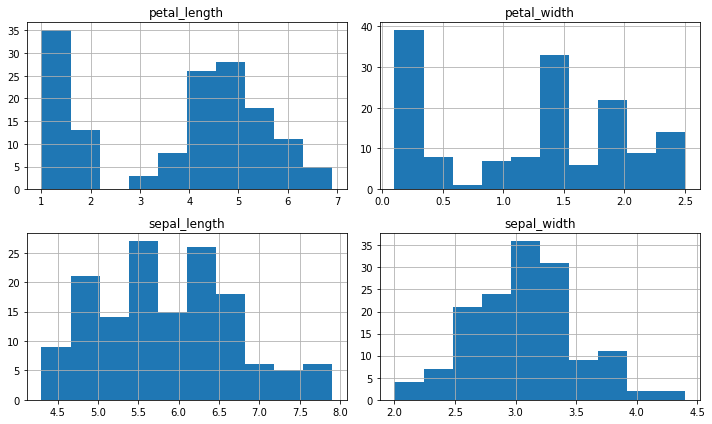

In [18]:
irisDF.hist(figsize=(10,6), bins=10) 
plt.tight_layout()

<h1> Box Plot </h1>


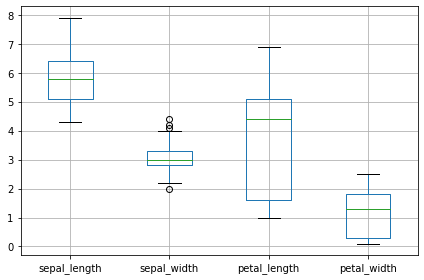

In [19]:
irisDF.boxplot()
plt.tight_layout()

<h1>Scatterplot</h1>

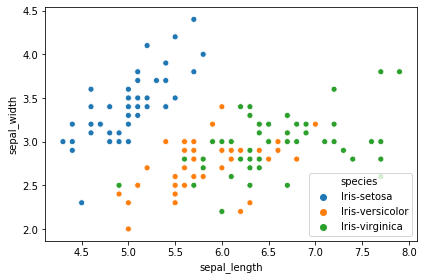

In [20]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=irisDF, hue='species') # HUE= Mengelompokkan/mengkategori data berdasarkan species
#plt.scatter[sepal_length, sepal_width]
plt.tight_layout()

<h1> Violin Plot </h1>

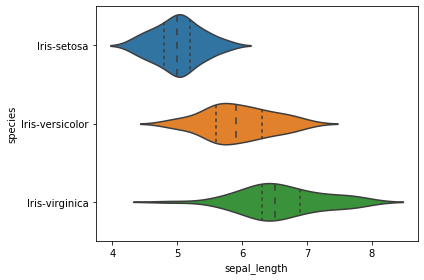

In [21]:
sns.violinplot(data=irisDF, y='species', x='sepal_length', inner ='quartile')
plt.tight_layout()

<h1> Pair Plot </h1>

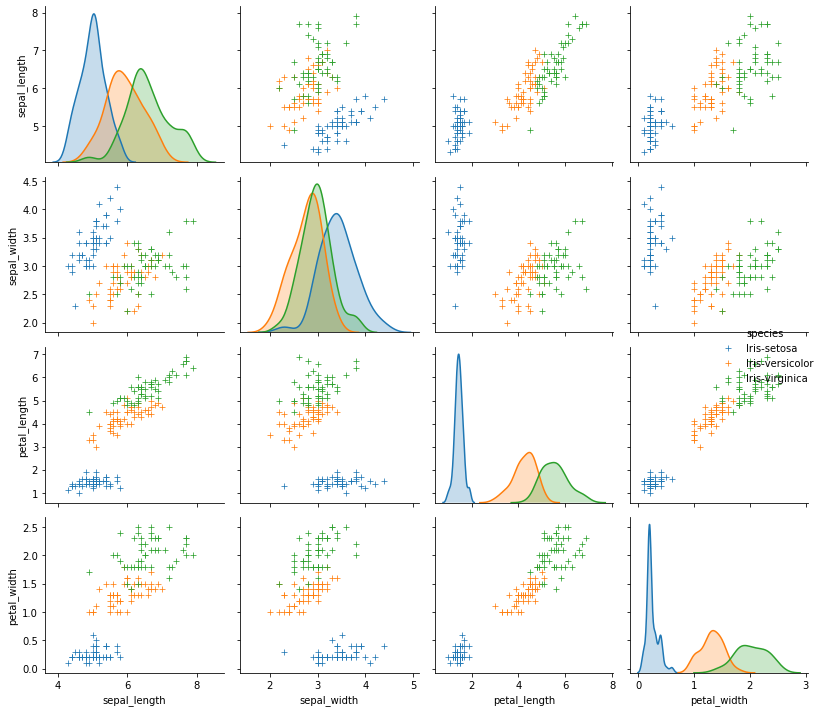

In [22]:
sns.pairplot(irisDF, hue='species', markers='+')
plt.tight_layout()

<h1>Classification Models </h1>

In [24]:
from sklearn.model_selection import train_test_split # pembagian dataset menjadi training dan testing set
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # evaluasi performa model

In [30]:
X = irisDF.drop(columns='species') #menempatkan features ke dalam variable X
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
y = irisDF['species'] #Menempatkan class label (target) ke dalam varaible y
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [32]:
#membagi dataset ke dalam training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 10)

print('Training dataset')
print(X_train.shape)
print(y_train.shape)
print()
print('Testing dataset :')
print(X_test.shape)
print(y_test.shape)

Training dataset
(88, 4)
(88,)

Testing dataset :
(59, 4)
(59,)


<h1> K Nearest Neighbors </h1>

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k) #konfigurasi algoritma
    model_knn.fit(X_train, y_train) #training model/classifier
    y_pred = model_knn.predict(X_test) #Melakukan Prediksi
    scores.append(accuracy_score(y_test, y_pred))# evaluasi performa

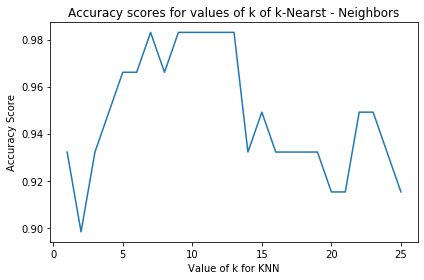

In [36]:
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy scores for values of k of k-Nearst - Neighbors')
plt.tight_layout()
plt.show()

In [74]:
model_knn = KNeighborsClassifier(n_neighbors=3) #Konfigurasi algoritma
model_knn.fit(X_train,y_train) # training model/calssifer
y_pred = model_knn.predict(X_test) # melakukan prediksi

<h1> Accuracy Score </h1>

In [75]:
print(accuracy_score(y_test, y_pred)) #evaluasi akurasi

0.9322033898305084


<h1> Confusion Matrix </h1>

In [76]:
print(confusion_matrix(y_test, y_pred)) #evaluasi confusion matrix

[[18  0  0]
 [ 0 19  2]
 [ 0  2 18]]


<h1> Classification Report </h1>

In [77]:
print(classification_report(y_test, y_pred)) #evaluasi klasifikasi

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.90      0.90      0.90        21
 Iris-virginica       0.90      0.90      0.90        20

       accuracy                           0.93        59
      macro avg       0.93      0.93      0.93        59
   weighted avg       0.93      0.93      0.93        59



<h1> Logistic Regression </h1>

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
model_logreg = LogisticRegression(solver='lbfgs', multi_class='auto')
model_logreg.fit(X_train,y_train)
y_pred = model_logreg.predict(X_test)

<h1> Accuracy Score </h1>

In [80]:
print(accuracy_score(y_test, y_pred))

0.9322033898305084


<h1> Confusion Matrix </h1>

In [81]:
print(confusion_matrix(y_test, y_pred))

[[18  0  0]
 [ 0 20  1]
 [ 0  3 17]]


<h1> Classification Report </h1>

In [82]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.87      0.95      0.91        21
 Iris-virginica       0.94      0.85      0.89        20

       accuracy                           0.93        59
      macro avg       0.94      0.93      0.93        59
   weighted avg       0.93      0.93      0.93        59



<h1> Support Vector Classifier </h1>

In [83]:
from sklearn.svm import SVC

In [84]:
model_svc = SVC(gamma='scale')
model_svc.fit(X_train,y_train)
y_pred = model_svc.predict(X_test)

<h1> Decision Tree Classifier </h1>

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)

<h1> Random Forest Classifier </h1>

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)

<h1> Accuracy Comparision for Varous Models </h1>

In [91]:
models = [model_knn, model_logreg, model_svc, model_dt, model_rf]
accuracy_scores = []
for model in models:
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
print(accuracy_scores)

[0.9491525423728814, 0.9491525423728814, 0.9491525423728814, 0.9491525423728814, 0.9491525423728814]


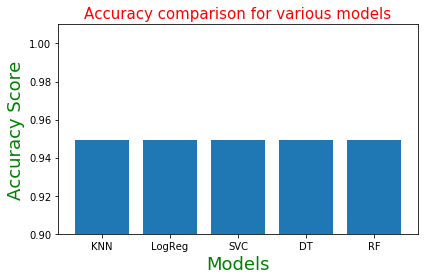

In [92]:
plt.bar(['KNN', 'LogReg', 'SVC', 'DT', 'RF'], accuracy_scores)
plt.ylim(0.90, 1.01)
plt.title('Accuracy comparison for various models', fontsize=15, color='r')
plt.xlabel('Models', fontsize=18, color='g')
plt.ylabel('Accuracy Score', fontsize=18, color='g')
plt.tight_layout()
plt.show()